# Data Exploration

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [7]:
# read in csv
speed_dating_data = pd.read_csv("Speed_Dating_Data.csv", encoding='ISO-8859-1')
sddf = speed_dating_data

In [10]:
# sets df to view all 195 columns of the data set
pd.set_option('display.max_columns', 200)

In [11]:
# sddf.info(max_cols=200)
sddf.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [12]:
# we have 8378 records, where each record is a date
sddf.shape

(8378, 195)

In [13]:
# convert number values for gender, race, race_o (aka race of partner) to text values
sddf['gender'] = sddf.gender.apply(lambda x: "female" if x==0 else "male")

race_map = {1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic American", \
            4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"}

sddf['race'] = sddf.race.map(race_map)
sddf['race_o'] = sddf.race_o.map(race_map)

In [14]:
#sddf.sample(n=5)

In [51]:
sample_sddf = sddf[(sddf.wave>=5) & (sddf.wave<=10)].sample(n=100)


In [52]:
wave6_9_sddf = sddf[(sddf.wave>=6) & (sddf.wave<=9)]

In [53]:
# list(sample_sddf.columns)

In [54]:
sample_sddf[['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',\
 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', \
 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].sort_values('wave')

,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
1716,5,50.00,15.00,10.00,10.00,10.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,70.00,5.00,5.00,10.00,5.00,5.00,8.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN
1829,5,80.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,20.00,10.00,10.00,NaN,NaN,5.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN
1684,5,20.00,20.00,20.00,20.00,10.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00,10.00,20.00,20.00,10.00,10.00,7.0,9.0,8.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
1893,6,20.83,20.83,16.67,16.67,6.25,18.75,10.0,9.0,4.0,7.0,8.0,8.0,19.05,7.14,19.05,23.81,21.43,9.52,7.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
1889,6,18.60,16.28,18.60,18.60,11.63,16.28,7.0,9.0,8.0,7.0,7.0,9.0,15.56,17.78,17.78,15.56,15.56,17.78,7.0,7.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
1852,6,12.77,19.15,17.02,17.02,14.89,19.15,7.0,7.0,7.0,7.0,6.0,7.0,24.32,16.22,13.51,16.22,10.81,18.92,6.0,8.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1877,6,20.00,20.00,20.00,20.00,6.67,13.33,9.0,9.0,7.0,8.0,3.0,7.0,18.37,18.37,16.33,16.33,16.33,14.29,8.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
1847,6,16.67,16.67,16.67,16.67,16.67,16.67,10.0,7.0,7.0,7.0,5.0,7.0,22.73,15.91,13.64,15.91,13.64,18.18,8.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN
1865,6,18.18,22.73,18.18,13.64,13.64,13.64,8.0,8.0,8.0,9.0,9.0,7.0,18.75,16.67,14.58,18.75,18.75,12.50,9.0,10.0,7.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN
1895,6,20.83,20.83,16.67,16.67,6.25,18.75,10.0,9.0,4.0,7.0,8.0,8.0,19.05,7.14,19.05,23.81,21.43,9.52,7.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN


In [77]:
# sddf['wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
sample_sddf.attr1_1.describe()

count    100.000000
mean      16.122100
std        3.184316
min        7.500000
25%       14.290000
50%       15.955000
75%       18.600000
max       25.640000
Name: attr1_1, dtype: float64

In [79]:
wave6_9_sddf.attr1_1.describe()

count    1557.000000
mean       16.158304
std         3.515382
min         6.670000
25%        14.290000
50%        16.000000
75%        18.000000
max        27.780000
Name: attr1_1, dtype: float64

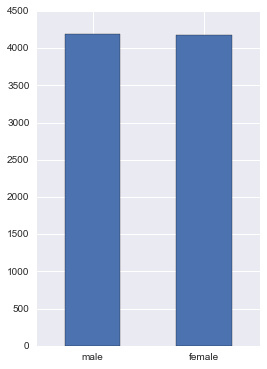

In [42]:
gender = sddf['gender'].value_counts() 
gender.plot(kind='bar', rot=0, figsize=(4,6), color)
# sns.plt.show()

# sns.barplot(x=sddf.gender.value_counts().index, y=sddf.gender.value_counts(), data=sddf, ci=None)
# sns.despine

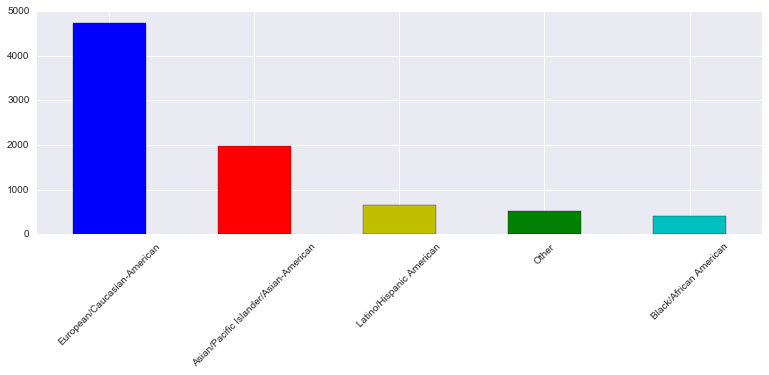

In [50]:
# b=sns.barplot(x=sddf.race.value_counts().index, y=sddf.race.value_counts(), data=sddf, ci=None )
# b.set_xticklabels(b.get_xticklabels(), rotation=45)

race_plt = sddf['race'].value_counts()
race_plt.plot(kind='bar', rot=45, figsize=(13,4), color=['b','r','y','g','c'])